In [4]:
from moondream import MoondreamModel, MoondreamConfig
from safetensors.torch import load_file
from dataset import load_object_detection_dataset
from visualization_utils import plot_sample, plot_prediction
from moondream_functions import detect

safetensors_path = "gpro_model_3.safetensors"
base_model_path = "model.safetensors"
original_model = MoondreamModel(config=MoondreamConfig)
model = MoondreamModel(config=MoondreamConfig)
device = "mps"

state_dict = load_file(safetensors_path)
base_state_dict = load_file(base_model_path)    
original_model.load_state_dict(base_state_dict)
original_model.to(device)


model.load_state_dict(state_dict)
model.to(device)


val_ds = load_object_detection_dataset("test")


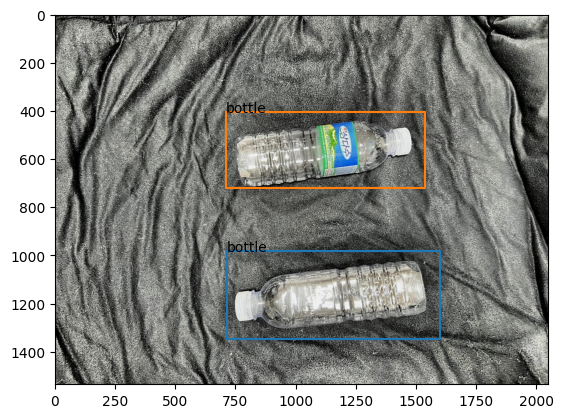

In [12]:
idx = 123

sample = val_ds[idx]

plot_sample(sample)



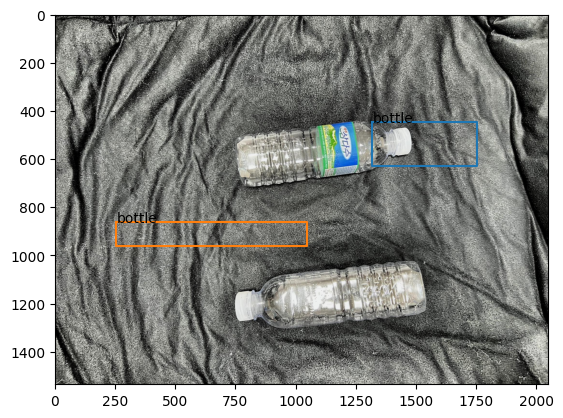

In [ ]:
predictions = detect(model, sample[0], sample[1], None, temperature=0)

plot_prediction(predictions, sample)

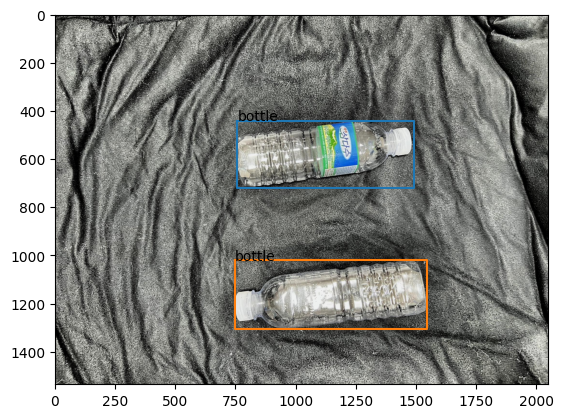

In [14]:
predictions = detect(original_model, sample[0], sample[1], None, temperature=0)

plot_prediction(predictions, sample)